<a href="https://colab.research.google.com/github/Gouthami-Channakeshavamurthy/Complete-Python-3-Bootcamp/blob/master/mnist_trial_white%20bkg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [4]:
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


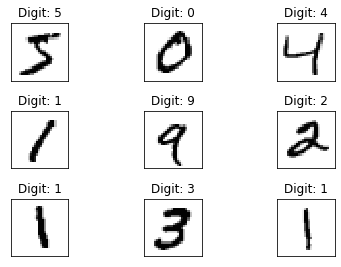

In [5]:
#visualising first 9 data from training dataset
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap=plt.cm.binary, interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
#fig

In [6]:
# let's print the actual data shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [0]:
#input image size 28*28
img_rows , img_cols = 28, 28

In [0]:
#Above code block can be replaced by this block
X_train_expand = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_expand = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train_expand = X_train_expand.astype('float16')
X_test_expand = X_test_expand.astype('float16')

In [9]:
print("All classes")
print(np.unique(y_train))

All classes
[0 1 2 3 4 5 6 7 8 9]


In [0]:
#set number of categories
num_category = 10

In [11]:
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, num_category)
Y_test = keras.utils.to_categorical(y_test, num_category)
print("First output array",Y_train[0],"\nNumber- ",np.argmax(Y_train[0]))

First output array [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 
Number-  5


In [0]:
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 strides=(1,1),padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_category, activation='softmax'))
#Model compilation
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [14]:
#Model fitting
batch_size = 128
num_epoch = 5 #We have to use 5 epochs
#model training
model_log = model.fit(X_train_expand, Y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_split=0.5)

Train on 30000 samples, validate on 30000 samples
Epoch 1/5
30000/30000 [==============================] - 21s 684us/step - loss: 1.0046 - accuracy: 0.8139 - val_loss: 0.3230 - val_accuracy: 0.9265
Epoch 2/5
30000/30000 [==============================] - 20s 678us/step - loss: 0.1917 - accuracy: 0.9513 - val_loss: 0.1692 - val_accuracy: 0.9558
Epoch 3/5
30000/30000 [==============================] - 20s 668us/step - loss: 0.0984 - accuracy: 0.9740 - val_loss: 0.2174 - val_accuracy: 0.9447
Epoch 4/5
30000/30000 [==============================] - 20s 669us/step - loss: 0.0615 - accuracy: 0.9821 - val_loss: 0.1277 - val_accuracy: 0.9690
Epoch 5/5
30000/30000 [==============================] - 20s 681us/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.1060 - val_accuracy: 0.9736


In [15]:
#Model performance evaluation
loss = model_log.history['loss']
val_loss = model_log.history['val_loss']
acc = model_log.history['accuracy']
val_acc = model_log.history['val_accuracy']
test_loss, test_acc = model.evaluate(X_test_expand, Y_test)

10000/10000 [==============================] - 3s 288us/step


In [16]:
#Model performance
print('Training Loss - ',loss[-1])
print('Validation Loss - ',val_loss[-1])
print('Training Accuraccy - ',acc[-1])
print('Validation Accuracy - ',val_acc[-1])
print('Testing Loss - ',test_loss)
print('Testing Accuracy - ',test_acc)

Training Loss -  0.03864193902860085
Validation Loss -  0.10601690820443134
Training Accuraccy -  0.98826665
Validation Accuracy -  0.9735666513442993
Testing Loss -  0.0938359197612619
Testing Accuracy -  0.975600004196167


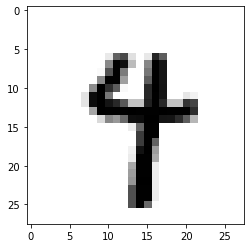

Predicted number-  4


In [18]:
#Prediction
predictions = model.predict([X_test_expand]) # Make prediction
plt.imshow(X_test[565], cmap=plt.cm.binary)
plt.show()
print("Predicted number- ",np.argmax(predictions[565])) # Print out the number

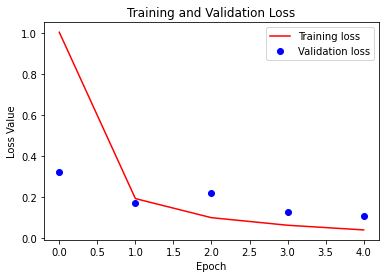

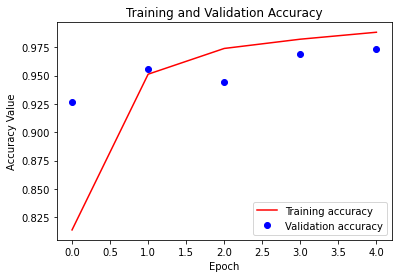

In [20]:
import os
epochs = range(num_epoch)
# plotting the metrics
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
#plt.ylim([0, 1])
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'bo', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()


In [0]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")